<a href="https://colab.research.google.com/github/MattIzon/16010269_DataAnalytics/blob/main/7_Create_LR_sets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Set-up
import pandas as pd
from google.colab import files

pd.set_option('display.max_columns', None)

def dlcsv(df,name):
  df.to_csv('{}.csv'.format(name), index=False)
  files.download('{}.csv'.format(name))

In [ ]:
#combine weather and crime for each year

data= []

for year in range(2015,2020):
  weather = pd.read_csv('https://raw.githubusercontent.com/MattIzon/16010269_DataAnalytics/main/data/w_{}.csv'.format(year)).set_index('date')
  crime = pd.read_csv('https://raw.githubusercontent.com/MattIzon/16010269_DataAnalytics/main/data/c_day_{}.csv'.format(year)).set_index('date')
  crime.drop('Unnamed: 0', axis=1, inplace=True)
  data.append(crime.join(weather).reset_index())

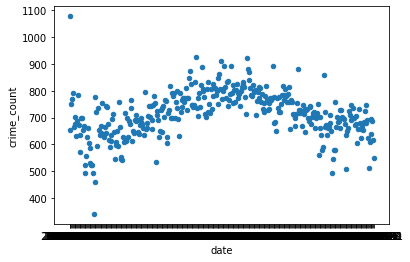

In [ ]:
data[4].plot(x = 'date', y = 'crime_count', kind = 'scatter')

In [ ]:
# Remove outliers (more than 2 standard deviations from mean)
adjusted = []

for year in range(5):
  df = data[year].copy()
  upper = df.crime_count.mean() + (2 * df.crime_count.std())
  lower = df.crime_count.mean() - (2 * df.crime_count.std())

  df.drop(df[df.crime_count > upper].index, inplace=True)
  df.drop(df[df.crime_count < lower].index, inplace=True)

  adjusted.append(df)

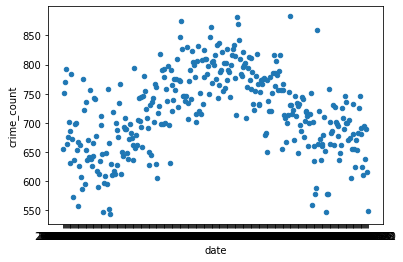

In [ ]:
adjusted[4].plot(x = 'date', y = 'crime_count', kind = 'scatter')

In [ ]:
# Normalise crime counts to ensure annual deviations dont skew the model

for year in adjusted:
  min = year.crime_count.min()
  max = year.crime_count.max()
  year.crime_count = (year.crime_count - min) / (max - min)

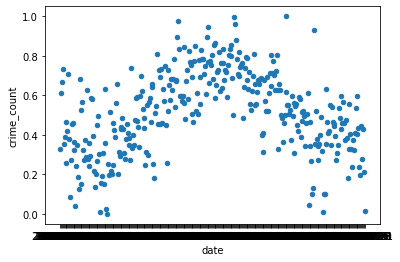

In [ ]:
adjusted[4].plot(x = 'date', y = 'crime_count', kind = 'scatter')

In [ ]:
# Combine all years into single dataset
combined = pd.concat(adjusted).reset_index()

In [ ]:
# Re-allocate day_of_week categories to produce a linear relationship
print(combined.groupby('day_of_week').mean()['crime_count'].sort_values()) # new order

cda = combined.copy() # cda ~ combined_day-of-week_adjusted
label_conversions = {1:3,
                     2:7,
                     3:5,
                     4:4,
                     5:1,
                     6:2,
                     7:6}
cda['day_of_week'].replace(label_conversions, inplace=True)

day_of_week
2    0.473659
7    0.477216
3    0.481432
4    0.491624
1    0.515032
6    0.525501
5    0.598156
Name: crime_count, dtype: float64


In [ ]:
combined.corr()['crime_count']

index                   0.202540
day_of_week             0.038562
crime_count             1.000000
mo                      0.205136
temp                    0.711720
dewp                    0.672268
slp                    -0.268781
stp                     0.119537
visib                   0.214685
wdsp                   -0.234855
mxpsd                  -0.148126
gust                   -0.143632
max                     0.707362
min                     0.691606
prcp                    0.003667
sndp                   -0.322452
fog                    -0.089910
rain_drizzle            0.008460
snow_ice_pellets       -0.375999
hail                         NaN
thunder                 0.130229
tornado_funnel_cloud         NaN
Name: crime_count, dtype: float64

In [ ]:
cda.corr()['crime_count']

index                   0.202540
day_of_week            -0.173704
crime_count             1.000000
mo                      0.205136
temp                    0.711720
dewp                    0.672268
slp                    -0.268781
stp                     0.119537
visib                   0.214685
wdsp                   -0.234855
mxpsd                  -0.148126
gust                   -0.143632
max                     0.707362
min                     0.691606
prcp                    0.003667
sndp                   -0.322452
fog                    -0.089910
rain_drizzle            0.008460
snow_ice_pellets       -0.375999
hail                         NaN
thunder                 0.130229
tornado_funnel_cloud         NaN
Name: crime_count, dtype: float64

In [ ]:
LR1 = combined[['day_of_week', 'crime_count']]
dlcsv(LR1, 'LR1')

LR2 = cda[['day_of_week', 'crime_count']]
dlcsv(LR2, 'LR2')  

In [ ]:
LR3 = combined[['day_of_week', 'temp', 'crime_count']]
dlcsv(LR3, 'LR3')

LR4 = cda[['day_of_week', 'temp', 'crime_count']]
dlcsv(LR4, 'LR4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
LR5 = combined[['day_of_week', 'temp', 'snow_ice_pellets', 'crime_count']]
dlcsv(LR5, 'LR5')

LR6 = cda[['day_of_week', 'temp', 'snow_ice_pellets', 'crime_count']]
dlcsv(LR6, 'LR6')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

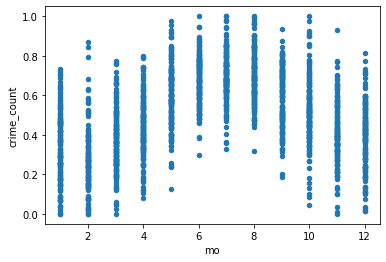

In [ ]:
combined.plot(x = 'mo', y = 'crime_count', kind = 'scatter')

In [ ]:
# Inspect half year based on crime count curve
half1 = combined.loc[combined['mo'].isin([1,2,3,4,11,12])]
half2 = combined.loc[combined['mo'].isin([5,6,7,8,9,10])]

print(half1.corr()['crime_count'])
print(half2.corr()['crime_count'])

LR7a = half1[['day_of_week', 'temp', 'snow_ice_pellets', 'crime_count']]
dlcsv(LR7a, 'LR7a')
LR7b = half2[['day_of_week', 'temp', 'rain_drizzle', 'crime_count']]
dlcsv(LR7b, 'LR7b')

index                   0.140700
day_of_week             0.009381
crime_count             1.000000
mo                      0.145160
temp                    0.466713
dewp                    0.416892
slp                    -0.252806
stp                     0.039125
visib                   0.066929
wdsp                   -0.085763
mxpsd                  -0.046724
gust                   -0.038065
max                     0.459298
min                     0.435046
prcp                   -0.028199
sndp                   -0.275567
fog                    -0.039634
rain_drizzle            0.059308
snow_ice_pellets       -0.281550
hail                         NaN
thunder                 0.057991
tornado_funnel_cloud         NaN
Name: crime_count, dtype: float64
index                  -0.199032
day_of_week             0.099110
crime_count             1.000000
mo                     -0.203019
temp                    0.489108
dewp                    0.388784
slp                    -0.057252
stp      

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Inspect individual months
months = []
for month in range(1,13):
  months.append(combined.loc[combined['mo'] == month])

for month in months:
  print(month.corr()['crime_count'])

index                   0.309739
day_of_week             0.033938
crime_count             1.000000
mo                           NaN
temp                    0.594544
dewp                    0.565399
slp                    -0.474188
stp                     0.011847
visib                  -0.062008
wdsp                   -0.046641
mxpsd                   0.007642
gust                    0.044191
max                     0.567319
min                     0.566499
prcp                    0.037057
sndp                   -0.278690
fog                     0.008074
rain_drizzle            0.209131
snow_ice_pellets       -0.323308
hail                         NaN
thunder                 0.011967
tornado_funnel_cloud         NaN
Name: crime_count, dtype: float64
index                  -0.221764
day_of_week             0.025218
crime_count             1.000000
mo                           NaN
temp                    0.247134
dewp                    0.217064
slp                    -0.170649
stp      

In [ ]:
LR8a = months[0][['day_of_week', 'temp', 'snow_ice_pellets', 'crime_count']]
dlcsv(LR8a, 'LR8a')

LR8b = months[1][['day_of_week', 'max', 'snow_ice_pellets', 'crime_count']]
dlcsv(LR8b, 'LR8b')

LR8c = months[2][['day_of_week', 'max', 'slp', 'crime_count']]
dlcsv(LR8c, 'LR8c')

LR8d = months[3][['day_of_week', 'max', 'visib', 'rain_drizzle', 'crime_count']]
dlcsv(LR8d, 'LR8d')

LR8e = months[4][['day_of_week', 'temp', 'crime_count']]
dlcsv(LR8e, 'LR8e')

LR8f = months[5][['day_of_week', 'max', 'visib', 'crime_count']]
dlcsv(LR8f, 'LR8f')

LR8g = months[6][['day_of_week', 'rain_drizzle', 'crime_count']]
dlcsv(LR8g, 'LR8g')

LR8h = months[7][['day_of_week', 'temp', 'rain_drizzle', 'crime_count']]
dlcsv(LR8h, 'LR8h')

LR8i = months[8][['day_of_week', 'temp', 'crime_count']]
dlcsv(LR8i, 'LR8i')

LR8j = months[9][['day_of_week', 'max', 'visib', 'prcp', 'rain_drizzle', 'crime_count']]
dlcsv(LR8j, 'LR8j')

LR8k = months[10][['day_of_week', 'max', 'sndp', 'crime_count']]
dlcsv(LR8k, 'LR8k')

LR8l = months[11][['day_of_week', 'temp', 'slp', 'sndp', 'rain_drizzle', 'crime_count']]
dlcsv(LR8l, 'LR8l')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Try an uneven split
q1 = combined.loc[combined['mo'].isin([1,2,3,4])]
summer = combined.loc[combined['mo'].isin([6,7,8])]
other = combined.loc[combined['mo'].isin([5,9])]
q4 = combined.loc[combined['mo'].isin([10,11,12])]

other.corr()['crime_count']

day_of_week             0.043179
crime_count             1.000000
mo                     -0.029949
temp                    0.416983
dewp                    0.330230
slp                    -0.053118
stp                    -0.016696
visib                   0.105570
wdsp                   -0.110157
mxpsd                  -0.079282
gust                   -0.030048
max                     0.419085
min                     0.339634
prcp                   -0.053192
sndp                         NaN
fog                    -0.035716
rain_drizzle           -0.186774
snow_ice_pellets             NaN
hail                         NaN
thunder                -0.071158
tornado_funnel_cloud         NaN
Name: crime_count, dtype: float64